# 1. 准备资源与环境

In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

# 2. Bigram 模型

最开始我们从 Bigram 这个模型出发。Bigram 每次只会处理 2 个字母：给出一个字母，预测下一个字母是什么。

Bigram 也是最简单的“token 预测模型”

In [5]:
for w in words:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a
o l
l i
i v
v i
i a
a v
v a
i s
s a
a b
b e
e l
l l
l a
s o
o p
p h
h i
i a
c h
h a
a r
r l
l o
o t
t t
t e
m i
i a
a m
m e
e l
l i
i a
h a
a r
r p
p e
e r
e v
v e
e l
l y
y n
a b
b i
i g
g a
a i
i l
e m
m i
i l
l y
e l
l i
i z
z a
a b
b e
e t
t h
m i
i l
l a
e l
l l
l a
a v
v e
e r
r y
s o
o f
f i
i a
c a
a m
m i
i l
l a
a r
r i
i a
s c
c a
a r
r l
l e
e t
t t
v i
i c
c t
t o
o r
r i
i a
m a
a d
d i
i s
s o
o n
l u
u n
n a
g r
r a
a c
c e
c h
h l
l o
o e
p e
e n
n e
e l
l o
o p
p e
l a
a y
y l
l a
r i
i l
l e
e y
z o
o e
e y
n o
o r
r a
l i
i l
l y
e l
l e
e a
a n
n o
o r
h a
a n
n n
n a
a h
l i
i l
l l
l i
i a
a n
a d
d d
d i
i s
s o
o n
a u
u b
b r
r e
e y
e l
l l
l i
i e
s t
t e
e l
l l
l a
n a
a t
t a
a l
l i
i e
z o
o e
l e
e a
a h
h a
a z
z e
e l
v i
i o
o l
l e
e t
a u
u r
r o
o r
r a
s a
a v
v a
a n
n n
n a
a h
a u
u d
d r
r e
e y
b r
r o
o o
o k
k l
l y
y n
b e
e l
l l
l a
c l
l a
a i
i r
r e
s k
k y
y l
l a
a r
l u
u c
c y
p a
a i
i s
s l
l e
e y
e v
v e
e r
r l


zip() 函数本身并不会拆散一个单词,它只是将两个或多个可迭代对象中的元素配对。在这个例子中,我们将一个单词 w 与它的子串 w[1:] 作为参数传递给 zip() 函数,这导致了单词被拆散成字母并进行组合。

让我们再次以单词 "emma" 为例:

外层循环遍历到单词 "emma" 时,内层循环开始执行。
zip(w, w[1:]) 将两个参数传递给 zip() 函数:
w: 即单词 "emma" 本身,是一个由字符组成的字符串。
w[1:]: 表示从索引 1 开始到字符串末尾的子串,即 "mma"。
zip() 函数将这两个字符串中的字符逐个配对:
第一次配对: "e" 与 "m"
第二次配对: "m" 与 "m"
第三次配对: "m" 与 "a"
内层循环遍历这些字符对,并打印出每对字符。
所以,单词被拆散成字母并进行组合的原因是我们将单词本身和它的子串作为两个独立的可迭代对象传递给了 zip() 函数。zip() 函数只是按照我们提供的可迭代对象中的元素进行配对,而这些元素恰好是单个字符。

如果我们将 zip() 函数的参数改为两个完整的单词,例如 zip("emma", "olivia"),那么 zip() 函数将配对这两个单词中的字符,而不会拆散单个单词。

> 也就是说：zip函数会将“可迭代”的入参，都使用它们“最小”元素进行匹配

## 对字符串进行特殊处理

对字符串的开头与结尾进行“标记”，让 LLM 知道从哪个字符开始与结束

In [7]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>
<S> i
i s
s a
a b
b e
e l
l l
l a
a <E>
<S> s
s o
o p
p h
h i
i a
a <E>
<S> c
c h
h a
a r
r l
l o
o t
t t
t e
e <E>
<S> m
m i
i a
a <E>
<S> a
a m
m e
e l
l i
i a
a <E>
<S> h
h a
a r
r p
p e
e r
r <E>
<S> e
e v
v e
e l
l y
y n
n <E>
<S> a
a b
b i
i g
g a
a i
i l
l <E>
<S> e
e m
m i
i l
l y
y <E>
<S> e
e l
l i
i z
z a
a b
b e
e t
t h
h <E>
<S> m
m i
i l
l a
a <E>
<S> e
e l
l l
l a
a <E>
<S> a
a v
v e
e r
r y
y <E>
<S> s
s o
o f
f i
i a
a <E>
<S> c
c a
a m
m i
i l
l a
a <E>
<S> a
a r
r i
i a
a <E>
<S> s
s c
c a
a r
r l
l e
e t
t t
t <E>
<S> v
v i
i c
c t
t o
o r
r i
i a
a <E>
<S> m
m a
a d
d i
i s
s o
o n
n <E>
<S> l
l u
u n
n a
a <E>
<S> g
g r
r a
a c
c e
e <E>
<S> c
c h
h l
l o
o e
e <E>
<S> p
p e
e n
n e
e l
l o
o p
p e
e <E>
<S> l
l a
a y
y l
l a
a <E>
<S> r
r i
i l
l e
e y
y <E>
<S> z
z o
o e
e y
y <E>
<S> n
n o
o r
r a
a <E>
<S> l
l i
i l
l y
y <E>
<S> e
e l
l e
e a
a n
n o
o r
r <E>
<S> h
h a
a n
n n
n a
a 

对于 Bigram 来讲，它所记录字符的“规律”是通过“计数”来实现的。简单来讲就是通过一个“字典”记录每个字符出现的频率

In [10]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1    # 累加
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>
<S> i
i s
s a
a b
b e
e l
l l
l a
a <E>
<S> s
s o
o p
p h
h i
i a
a <E>
<S> c
c h
h a
a r
r l
l o
o t
t t
t e
e <E>
<S> m
m i
i a
a <E>
<S> a
a m
m e
e l
l i
i a
a <E>
<S> h
h a
a r
r p
p e
e r
r <E>
<S> e
e v
v e
e l
l y
y n
n <E>
<S> a
a b
b i
i g
g a
a i
i l
l <E>
<S> e
e m
m i
i l
l y
y <E>
<S> e
e l
l i
i z
z a
a b
b e
e t
t h
h <E>
<S> m
m i
i l
l a
a <E>
<S> e
e l
l l
l a
a <E>
<S> a
a v
v e
e r
r y
y <E>
<S> s
s o
o f
f i
i a
a <E>
<S> c
c a
a m
m i
i l
l a
a <E>
<S> a
a r
r i
i a
a <E>
<S> s
s c
c a
a r
r l
l e
e t
t t
t <E>
<S> v
v i
i c
c t
t o
o r
r i
i a
a <E>
<S> m
m a
a d
d i
i s
s o
o n
n <E>
<S> l
l u
u n
n a
a <E>
<S> g
g r
r a
a c
c e
e <E>
<S> c
c h
h l
l o
o e
e <E>
<S> p
p e
e n
n e
e l
l o
o p
p e
e <E>
<S> l
l a
a y
y l
l a
a <E>
<S> r
r i
i l
l e
e y
y <E>
<S> z
z o
o e
e y
y <E>
<S> n
n o
o r
r a
a <E>
<S> l
l i
i l
l y
y <E>
<S> e
e l
l e
e a
a n
n o
o r
r <E>
<S> h
h a
a n
n n
n a
a 

In [11]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [14]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

## 使用 pytorch 向量进行计数

In [15]:
import torch

有 26 个字母，外加 2 个特殊字符，一共 28 个字符。

所以创建 28 x 28 维度的数组用以表示

In [18]:
N = torch.zeros((28, 28), dtype=torch.int32)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [27]:
# 数据集中全部的字符（token）
chars = sorted(list(set(''.join(words))))

# 定义 encoder
stoi = { s:i for i, s in enumerate(chars) }
stoi['<S>'] = 26
stoi['<E>'] = 27

# 定义 decoder
itos = { i:s for s, i in stoi.items() }

In [23]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [24]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        N[idx1, idx2] += 1  # 累加

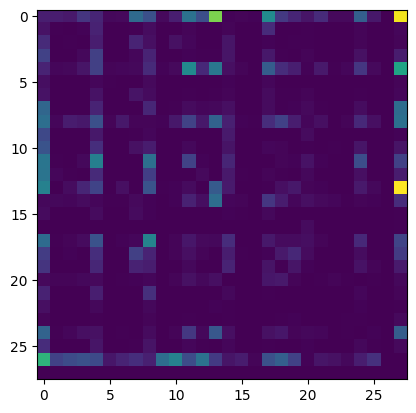

In [26]:
# matplotlib 图像化
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')